<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 26 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab6_NPM_Nama.ipynb**. Contoh: A_Lab6_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **26 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [187]:
# Isi dengan data diri Anda
NAMA = "FRIGAS HANIFYAN ZALWI"
KELAS = "B"
NPM = "2006596005"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a",
 "https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression",
 "https://chrisalbon.com/code/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/",
 "https://datascience.stackexchange.com/questions/28353/always-drop-the-first-column-after-performing-one-hot-encoding"
 ]

In [188]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, FRIGAS HANIFYAN ZALWI dari kelas B dengan NPM 2006596005, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (FRIGAS HANIFYAN ZALWI)


## Intro to Linear Models for Regression and Classification

Pada lab kali ini, Anda akan mengimplementasikan model-model linear untuk melakukan prediksi regresi maupun klasifikasi. Beberapa model tersebut antara lain:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Logistic Regression
- Softmax Regression

Sebelum ke latihan soal, mari pelajari sekilas mengenai beberapa model linear ini serta implementasinya dengan menggunakan Scikit-learn.

**NOTE:** Penjelasan di sini, sebagian besar, hanya untuk menunjukkan saja. Anda perlu belajar dari sumber lain (contoh: slide kuliah) untuk lebih memahami materi-materi di sini. Walau demikian, semoga penjelasan di sini dapat membantu Anda :)

### Linear Regression

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

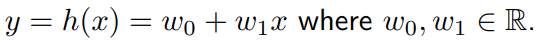

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah nilai independen
- y adalah nilai dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

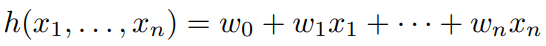

atau

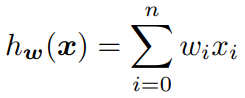

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

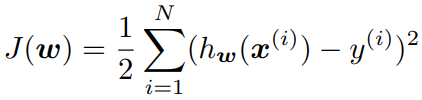

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 3 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2x1+x2-x3`. Nilai-nilai 1, 2, 1, dan -1, secara berurutan dapat dianggap sebagai nilai w0, w1, w2, dan w3.

In [189]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_train   = np.array([6, 10, 4, 11, 12, 9, 4, 7, 7, 1])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [ 6 10  4 11 12  9  4  7  7  1]


In [190]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [191]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model

print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [ 1.90430504  1.2595326  -1.03653137]
Intersep persamaan linear: 
 0.5921279212792099


Dapat dilihat bahwa nilai-nilai di atas hampir mirip dengan nilai-nilai intersep dan koefisien fungsi yang didefinisikan sebelumnya.

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [192]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_test = np.array([7, 2])

y_predict = linear.predict(X_test)

print(y_predict)

[7.14280443 2.12890529]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik. 

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [193]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.997039225742811


Dari hasil di atas, dapat diketahui bahwa perbedaan antara prediksi dan aktual memiliki nilai yang kecil.

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension). 

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

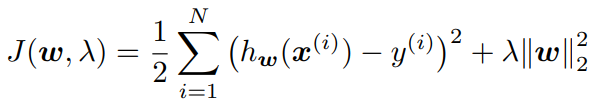

- Lasso Regression

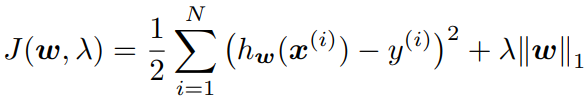

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset housing.

In [194]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5) # Mengatur hyperparameter alpha=5
ridge.fit(X_train, y_train)

Ridge(alpha=5)

Setelah pelatihan selesai, **ridge** sudah memiliki parameter-parameter yang dianggap cocok dalam persamaan linear regression dengan generalisasi ridge regression.

In [195]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=5) # Mengatur hyperparameter alpha=5
lasso.fit(X_train, y_train)

Lasso(alpha=5)

Setelah pelatihan selesai, **ridge** sudah memiliki parameter-parameter yang dianggap cocok dalam persamaan linear regression dengan generalisasi ridge regression.

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil.

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

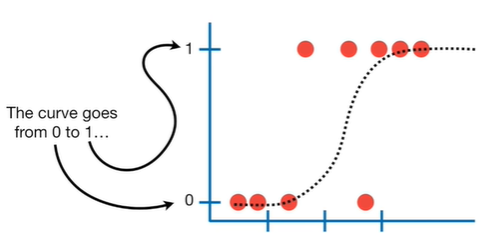

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

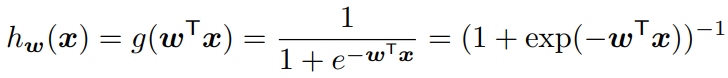

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual. 

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

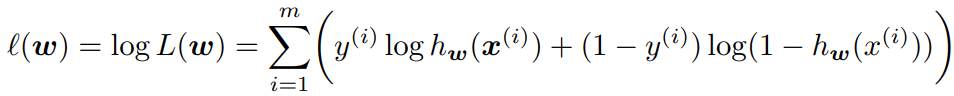

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Data yang digunakan sama seperti pada bagian sebelumnya, hanya saja terdapat perubahan pada data target. Kali ini target hanya berisi nilai 0 atau 1. Nilai target (y_logistic_train) diolah dari y_train, dengan kondisi: bernilai 0 jika y_train >= 7 dan bernilai 1 jika sebaliknya.


In [196]:
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_logistic_train   = np.array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [ 6 10  4 11 12  9  4  7  7  1]


In [197]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [198]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_test = np.array([1, 0])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [199]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

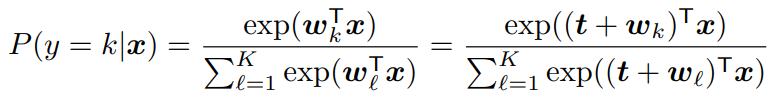

Persamaan likelihood softmaxe regression:

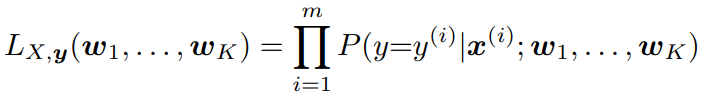

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Data yang digunakan sama seperti pada bagian sebelumnya, hanya saja terdapat perubahan pada data target. Kali ini target hanya berisi nilai 0, 1, 2. Nilai target (y_softmax_train) diolah dari y_train, dengan kondisi: bernilai 0 jika y_train < 6, bernilai 1 jika 6 <= y_train < 9, dan bernilai 2 jika y_train >=.


In [200]:
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_softmax_train   = np.array([1, 2, 0, 2, 2, 2, 0, 1, 1, 0])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [1 2 0 2 2 2 0 1 1 0]


In [201]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [202]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_softmax_test = np.array([1, 0])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[2 0]


Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [203]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


## Latihan Soal

Pada bagian ini, Anda akan membuat prediksi regresi dan klasifikasi menggunakan beberapa model linear yang telah dipelajari di atas. Data yang digunakan lebih besar dibandingkan data buatan sebelumnya.

### Penjelasan Dataset

Dataset yang digunakan pada bagian ini adalah data perumahan di California, USA. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Longitude:** Ukuran seberapa jauh ke barat sebuah rumah; nilai yang lebih tinggi lebih jauh ke barat

- **Latitude:** Ukuran seberapa jauh ke utara sebuah rumah; nilai yang lebih tinggi lebih jauh ke utara

- **TotalRooms:** Jumlah total kamar dalam satu blok

- **TotalBedrooms:** Jumlah total kamar tidur dalam satu blok

- **Population:** Jumlah total orang yang tinggal dalam satu blok

- **Households:** Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, untuk satu blok

- **HousingMedianAge:** Usia median sebuah rumah dalam satu blok; angka yang lebih rendah adalah bangunan yang lebih baru

- **MedianIncome:** Pendapatan median untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS)

- **TargetMedianHouseValue:** Nilai rumah rata-rata untuk rumah tangga dalam satu blok (diukur dalam Dolar AS)

- **TargetLogistic:** Pengelompokan nilai rumah rata-rata yang dibagi menjadi dua. Pembagi berdasarkan nilai mediannya (=17845). Bernilai 1 jika targetMedianHouseValue > 178450 dan 0 sebaliknya

- **TargetSoftmax:** Pengelompokan nilai rumah rata-rata yang dibagi menjadi tiga. Pembagi berdasarkan nilai persentil ke-33.33 (=142700) dan persentil ke-66.67 (=234900). Bernilai 2 jika targetMedianHouseValue >= 234900, 1 jika 142700 <= targetMedianHouseValue < 234900, dan 0 jika targetMedianHouseValue < 142700

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Preprocessing

In [204]:
import pandas as pd

# Import dataset california housing
df = pd.read_csv('ca_housing.csv')

df.head()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,OceanProximity,TargetMedianHouseValue,TargetLogistic,TargetSoftmax
0,-122.69,38.34,2846,516.0,1526,492,23,3.7330,<1H OCEAN,163500,0,1
1,-117.28,32.83,2392,653.0,933,619,34,3.7306,NEAR OCEAN,500000,1,2
2,-122.04,37.31,2476,434.0,1217,416,29,6.2045,<1H OCEAN,393800,1,2
3,-117.07,32.91,2234,256.0,894,253,5,10.3354,<1H OCEAN,477600,1,2
4,-117.92,33.83,382,86.0,272,81,17,1.4250,<1H OCEAN,212500,1,1


In [205]:
# Menampilkan ringkasan data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitude               1000 non-null   float64
 1   Latitude                1000 non-null   float64
 2   TotalRooms              1000 non-null   int64  
 3   TotalBedrooms           988 non-null    float64
 4   Population              1000 non-null   int64  
 5   Households              1000 non-null   int64  
 6   HousingMedianAge        1000 non-null   int64  
 7   MedianIncome            1000 non-null   float64
 8   OceanProximity          1000 non-null   object 
 9   TargetMedianHouseValue  1000 non-null   int64  
 10  TargetLogistic          1000 non-null   int64  
 11  TargetSoftmax           1000 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 93.9+ KB


In [206]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df.describe()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,TargetMedianHouseValue,TargetLogistic,TargetSoftmax
count,1000.000000,1000.000000,1000.000000,988.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,-119.571240,35.621040,2598.210000,527.345142,1403.143000,494.167000,29.350000,3.844988,209471.146000,0.50000,1.001000
std,2.022209,2.159259,2117.999988,395.919615,1064.360733,361.361508,12.841199,1.887100,117527.151777,0.50025,0.817109
min,-124.230000,32.560000,26.000000,9.000000,26.000000,10.000000,2.000000,0.706900,14999.000000,0.00000,0.000000
25%,-121.790000,33.930000,1437.500000,299.000000,792.750000,284.000000,19.000000,2.475475,122175.000000,0.00000,0.000000
50%,-118.470000,34.235000,2101.500000,418.000000,1151.500000,398.000000,30.000000,3.534100,178450.000000,0.50000,1.000000
75%,-118.007500,37.720000,3102.250000,623.250000,1688.000000,595.750000,38.000000,4.792300,268350.000000,1.00000,2.000000
max,-115.510000,41.860000,30401.000000,4957.000000,13251.000000,4339.000000,52.000000,15.000100,500001.000000,1.00000,2.000000


In [207]:
# Melihat deskripsi statistik dari kelompok fitur kategorikal
display(df.describe(include=object))

,OceanProximity
count,1000
unique,4
top,<1H OCEAN
freq,465


**Penanganan Missing Values**

In [208]:
# Melihat jumlah missing values

def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]
    
cek_missing_values(df)

,Total,Percent
TotalBedrooms,12,0.012


Terdapat missing values pada kolom TotalBedrooms, sebesar 1.2%. Untuk mengatasi ini, nilai null diganti dengan nilai median.

In [209]:
# Menangani missing values dengan median
df.TotalBedrooms.fillna(df.TotalBedrooms.median(), inplace=True)

cek_missing_values(df)

,Total,Percent


**Penanganan Duplikasi Data**

In [210]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


**Penanganan Outliers**

In [211]:
# Melihat jumlah kemungkinan adanya outliers pada data menggunakan IQR

# Menghitung quartil 1 dan 3.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (df < lower_limit) | (df > upper_limit)
print ("Outlier pada tiap atribut:")
print(outliers.sum())

Outlier pada tiap atribut:
Households                62
HousingMedianAge           0
Latitude                   0
Longitude                  0
MedianIncome              28
OceanProximity             0
Population                63
TargetLogistic             0
TargetMedianHouseValue    54
TargetSoftmax              0
TotalBedrooms             69
TotalRooms                64
dtype: int64


C:\Users\frigas\AppData\Local\Temp\ipykernel_29420\992103619.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


Berdasarkan hasil di atas, terdapat beberapa outliers. Kali ini, outliers tersebut ditangani dengan menghapusnya.

In [212]:
# Menghapus outliers
df_cleaned = df[~((df <= lower_limit) | (df >= upper_limit)).any(axis=1)].reset_index(drop=True)

print(df_cleaned.shape)

(848, 12)


C:\Users\frigas\AppData\Local\Temp\ipykernel_29420\1083563925.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df[~((df <= lower_limit) | (df >= upper_limit)).any(axis=1)].reset_index(drop=True)


**NOTE:** Warning di atas terjadi karena terdapat kolom yang berjenis kategorikal, yaitu OceanProximity. Tidak perlu khawatir dengan warning tersebut.

**Encoding Data Kategorikal**

Karena terdapat kolom yang berjenis kategorikal, maka perlu dilakukan encoding agar menjadi data numerik. Metode encoding yang dilakukan adalah one-hot encoding.

In [213]:
# Melakukan one-hot encoding data kategorikal

df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned.head()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,TargetMedianHouseValue,TargetLogistic,TargetSoftmax,OceanProximity_INLAND,OceanProximity_NEAR BAY,OceanProximity_NEAR OCEAN
0,-122.69,38.34,2846,516.0,1526,492,23,3.7330,163500,0,1,0,0,0
1,-122.04,37.31,2476,434.0,1217,416,29,6.2045,393800,1,2,0,0,0
2,-117.92,33.83,382,86.0,272,81,17,1.4250,212500,1,1,0,0,0
3,-122.26,37.77,1670,350.0,793,299,52,2.9732,282100,1,2,0,1,0
4,-122.30,38.33,4741,956.0,2043,856,15,4.1862,183600,1,1,0,1,0


**Memisahkan Kolom-Kolom Target dan Fitur**

In [214]:
# Memisahkan kolom-kolom target untuk regression, logistic regression, dan softmax regression dari kolom-kolom fitur

X = df_cleaned.drop('TargetMedianHouseValue', axis=1)
X = X.drop('TargetLogistic', axis=1)
X = X.drop('TargetSoftmax', axis=1)

y = df_cleaned['TargetMedianHouseValue']
y_logistic = df_cleaned['TargetLogistic']
y_softmax = df_cleaned['TargetSoftmax']

Pada tahap ini, kita sudah memiliki:
- **X:** kolom-kolom fitur
- **y:** kolom target untuk linear, ridge, dan lasso regression
- **y_logistic:** kolom target logistic regression
- **y_softmax:** kolom target softmax regression

Dataset sudah siap digunakan. Saat ini, Anda diminta untuk mengerjakan latihan soal di bawah ini.

### Soal 1: Linear Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 123)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set.

In [216]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c. Lakukan prediksi TargetMedianHouseValue menggunakan Linear Regression

In [217]:
linear = LinearRegression()
linear.fit(X_train, y_train)

y_predict = linear.predict(X_test)

d. Tampilkan visualisasi perbandingan hasil prediksi dengan aktual

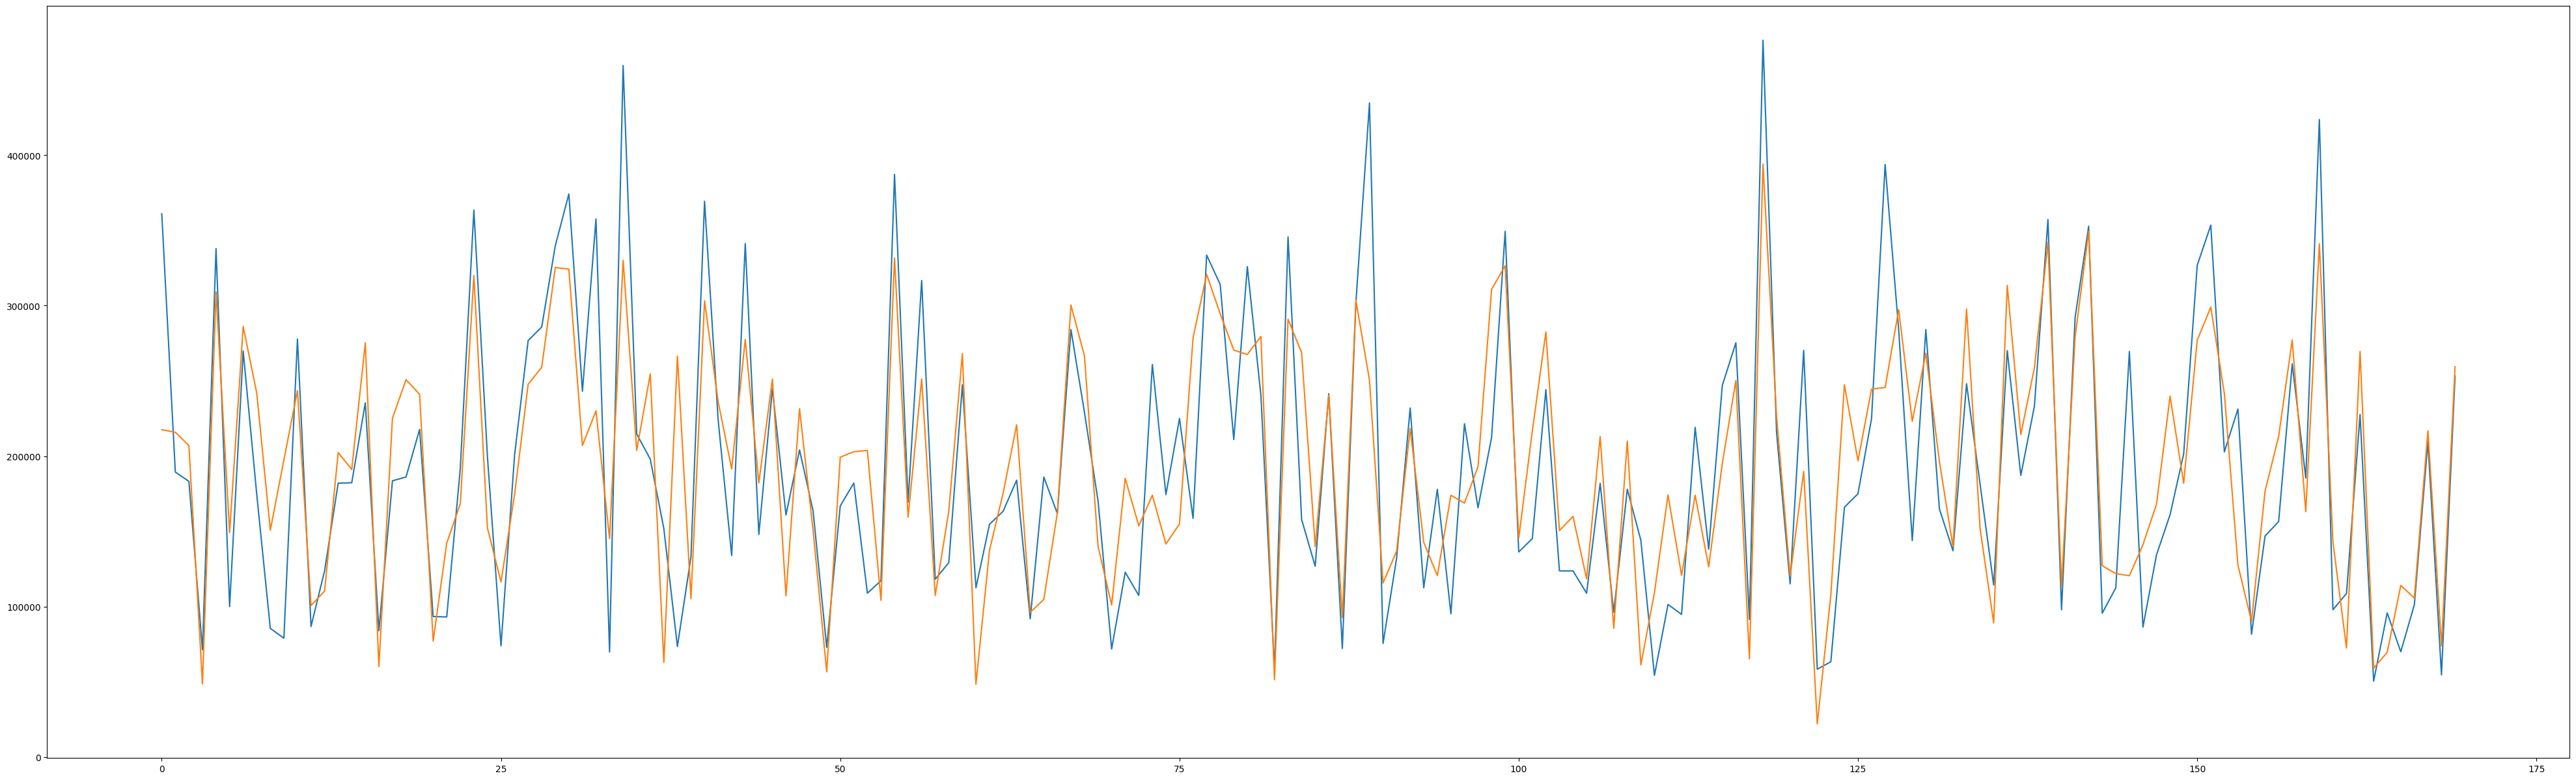

In [218]:
import matplotlib.pyplot as plt

y_temp = np.array(y_test)

plt.figure(figsize=(50,15))
plt.plot(y_temp)
plt.plot(y_predict)
plt.show()


e. Persamaan linear apa yang terbentuk pada model linear regression yang dilatih?

In [219]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model

print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)


Koefisien persamaan linear: 
 [-50949.01402998 -53886.053856    -9251.15459755  24179.43815593
 -40156.14102477  24725.08688818  14702.46836151  59716.01491949
 -15175.30610197  -4653.54376761  -1990.02391273]
Intersep persamaan linear: 
 188148.37610619477


Sehingga persamaan linear yang memenuhi adalah y = 1 - 28660x1 - 228524x2 - 49052x3 + 120880x4 - 202527x5 + 123531x6 + 57264x7 + 307366x8 - 32651x9 - 15391x10 - 5838x11

f. Tampilkan metrik evaluasi regresi yang mencakup MSE, MAE, RMSE, dan R2 Squared!

In [220]:
from sklearn import metrics

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2946981504.0938253
MAE: 41685.2678107049
RMSE: 54286.10783703162
R-squared: 0.6691147032701661


### Soal 2: Ridge Regression

Ikuti langkah-langkah di bawah ini. Gunakan training dan testing set yang sama dengan Linear Regression.

a. Tentukan minimal 5 buah nilai parameter alpha untuk digunakan dalam membangun model Ridge Regression

In [221]:
ridge1 = Ridge(alpha=1) # Mengatur hyperparameter alpha=1


ridge2 = Ridge(alpha=5) # Mengatur hyperparameter alpha=5


ridge3 = Ridge(alpha=10) # Mengatur hyperparameter alpha=10


ridge4 = Ridge(alpha=20) # Mengatur hyperparameter alpha=20


ridge5 = Ridge(alpha=30) # Mengatur hyperparameter alpha=30


b. Bangun (fit) model sebanyak nilai parameter alpha yang dipilih 

In [222]:
ridge1.fit(X_train, y_train)

ridge2.fit(X_train, y_train)

ridge3.fit(X_train, y_train)

ridge4.fit(X_train, y_train)

ridge5.fit(X_train, y_train)

Ridge(alpha=30)

c. Tampilkan nilai R-squared untuk masing-masing model pada training dan testing set

In [223]:
#Ridge alpha 1
y_predict = ridge1.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))



MSE: 2948137824.5178137
MAE: 41666.72121803996
RMSE: 54296.75703499992
R-squared: 0.6689848723139573


In [224]:
#Ridge alpha 2
y_predict = ridge2.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2956060072.4268923
MAE: 41606.283053547995
RMSE: 54369.66132345219
R-squared: 0.6680953671214336


In [225]:
#Ridge alpha 3
y_predict = ridge3.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2968637767.400435
MAE: 41630.08383985841
RMSE: 54485.20686755658
R-squared: 0.6666831511547854


In [226]:
#Ridge alpha 4
y_predict = ridge4.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2994327535.036404
MAE: 41745.31392132063
RMSE: 54720.448965961565
R-squared: 0.6637987196185373


In [227]:
#Ridge alpha 5
y_predict = ridge5.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 3018650012.2099833
MAE: 41819.06923593222
RMSE: 54942.24251165931
R-squared: 0.6610678066265132


d. Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Pada bagian C saya juga menggunakan bantuan MSE, MAE, dan RMSE untuk memvalidasi lebih lanjut perbandingannya. Diketahui dari penjabaran alpha2nya diketahui bahwa alpha 1 memiliki model terbaik karena nilai MSE, MAE, dan RMSE lebih kecil dibanding alpha lainya. Begitu pula dengan R-squared yang lebih besar dibanging alpha lainnya. Oleh karena itu pengambilan alpha kecil memiliki tingkat model yang lebih baik. Mari kita coba ambil alpha =100 untuk membuktikannya

In [228]:
ridge_x = Ridge(alpha=100) # Mengatur hyperparameter alpha=100
ridge_x.fit(X_train, y_train)

#Ridge alpha 10
y_predict = ridge_x.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))


MSE: 3174355693.985167
MAE: 42560.72262967091
RMSE: 56341.42076647666
R-squared: 0.6435852670703157


Saat dicoba alpha=100 yang dimana lebih besar dari satu maka model diketahui semakin buruk karena nilai MSE, MAE, dan RMSE yang semakin besar dan R-squared yang semakin kecil

### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. Gunakan training dan testing set yang sama dengan Linear Regression.

a. Tentukan minimal 5 buah nilai parameter alpha untuk digunakan dalam membangun model Lasso Regression

In [229]:
lasso1 = Lasso(alpha=1) # Mengatur hyperparameter alpha=1

lasso2 = Lasso(alpha=5) # Mengatur hyperparameter alpha=5

lasso3 = Lasso(alpha=10) # Mengatur hyperparameter alpha=10

lasso4 = Lasso(alpha=20) # Mengatur hyperparameter alpha=20

lasso5 = Lasso(alpha=30) # Mengatur hyperparameter alpha=30

b. Bangun (fit) model sebanyak nilai parameter alpha yang dipilih

In [230]:
lasso1.fit(X_train, y_train)

lasso2.fit(X_train, y_train)

lasso3.fit(X_train, y_train)

lasso4.fit(X_train, y_train)

lasso5.fit(X_train, y_train)

Lasso(alpha=30)

c. Tampilkan nilai R-squared untuk masing-masing model pada training dan testing set

In [231]:
#Lasso alpha 1
y_predict = lasso1.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2946986214.395684
MAE: 41685.04063222356
RMSE: 54286.151221058986
R-squared: 0.6691141744003288


In [232]:
#Lasso alpha 2
y_predict = lasso2.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2947007297.007499
MAE: 41684.131944122855
RMSE: 54286.34540109971
R-squared: 0.6691118072574551


In [233]:
#Lasso alpha 3
y_predict = lasso3.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2947038679.46545
MAE: 41682.996288318165
RMSE: 54286.634445924625
R-squared: 0.6691082836541015


In [234]:
#Lasso alpha 4
y_predict = lasso4.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2947118031.204828
MAE: 41680.7260474274
RMSE: 54287.36529990038
R-squared: 0.6690993740889095


In [235]:
#Lasso alpha 5
y_predict = lasso5.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2947219408.941883
MAE: 41678.46089342748
RMSE: 54288.29900578837
R-squared: 0.6690879914580512


d. Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Pada bagian C saya juga menggunakan bantuan MSE, MAE, dan RMSE untuk memvalidasi lebih lanjut perbandingannya. Diketahui dari penjabaran alpha2nya diketahui bahwa alpha 1 memiliki model terbaik karena nilai MSE, MAE, dan RMSE lebih kecil dibanding alpha lainya. Begitu pula dengan R-squared yang lebih besar dibanging alpha lainnya. Oleh karena itu pengambilan alpha kecil memiliki tingkat model yang lebih baik. Mari kita coba ambil alpha =100 untuk membuktikannya

In [236]:
lasso_x = Lasso(alpha=100) # Mengatur hyperparameter alpha=100
lasso_x.fit(X_train, y_train)

#Lasso alpha 100
y_predict = lasso_x.predict(X_test)

# Nilai MSE
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
# Nilai MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
# Nilai RMSE
print("RMSE:", np.sqrt( metrics.mean_squared_error(y_test, y_predict)))
# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

MSE: 2948535884.601893
MAE: 41662.657989507
RMSE: 54300.422508502576
R-squared: 0.668940178369033


Saat dicoba alpha=100 yang dimana lebih besar dari lima maka model diketahui semakin buruk karena nilai MSE, MAE, dan RMSE yang semakin besar dan R-squared yang semakin kecil. Namun, perbedaan dari lasso regression adalah perubahan R squarednya yang relaif kecil dibanding ridge

### Soal 4: Logistic Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y_logistic, test_size = 0.2,random_state = 123)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [238]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c. Lakukan prediksi TargetLogistic menggunakan Logistic Regression

In [239]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [240]:
y_predict = logistic.predict(X_test)

d. Tampilkan confussion matrix hasil prediksi

In [241]:
print("Confusion Matrix")
print()
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
display(df_confusion)

Confusion Matrix



prediction,0,1
actual,,
0,72,13
1,16,69


e. Tampilkan hasil evaluasi model klasifikasi

In [242]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, y_pred, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_pred, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_pred, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_pred, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_pred, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_pred, average='micro',zero_division=0))


Nilai rata-rata akurasi: 0.8294117647058824
F1 Macro Average: 0.8293586237928767
F1 Micro Average: 0.8294117647058825
Precision Macro Average: 0.8298226164079823
Precision Micro Average: 0.8294117647058824
Recall Macro Average: 0.8294117647058823
Recall Micro Average: 0.8294117647058824


f. Berikan analisis terhadap hasil evaluasi

Dari hasil evaluasi diatas dapat dilihat bahwa model yang kita miliki memiliki tingkat akurasi di 83%, begitu pula dengan nilai F1, precision dan recallnya. Dengan demikian, dengan menggunakan logistic regression menciptakan model yang memiliki performa cukup bagus

### Soal 5: Softmax Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y_softmax, test_size = 0.2,random_state = 123)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set.

In [244]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c. Lakukan prediksi TargetSoftmax menggunakan Softmax Regression

In [245]:
softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [246]:
y_predict = softmax.predict(X_test)

d. Tampilkan confussion matrix hasil prediksi

In [247]:
print("Confusion Matrix")
print()
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
display(df_confusion)

Confusion Matrix



prediction,0,1,2
actual,,,
0,49,8,2
1,13,34,15
2,1,6,42


e. Tampilkan hasil evaluasi model klasifikasi

In [248]:
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_test))
print('F1 Macro Average:', f1_score(y_test, y_pred, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_pred, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_pred, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_pred, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_pred, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_pred, average='micro',zero_division=0))

Nilai rata-rata akurasi: 0.7352941176470589
F1 Macro Average: 0.7330794281613953
F1 Micro Average: 0.735294117647059
Precision Macro Average: 0.7326585059635907
Precision Micro Average: 0.7352941176470589
Recall Macro Average: 0.7453461428311073
Recall Micro Average: 0.7352941176470589


f. Berikan analisis terhadap hasil evaluasi

Dari hasil evaluasi diatas dapat dilihat bahwa model yang kita miliki memiliki tingkat akurasi di 73%, begitu pula dengan nilai F1, precision dan recallnya. Dengan demikian, dengan menggunakan softmax regression menciptakan model yang memiliki performa kurang bagus.

### Soal 6: Pertanyaan Teoritis

Jawablah pertanyaan-pertanyaan di bawah ini.

a. Pada bagian preprocessing data dilakukan one-hot encoding untuk kolom kategorikal. Perhatikan bahwa terdapat pengaturan parameter **drop_first=True**. Apa yang dilakukan oleh pengaturan tersebut? Apa manfaatnya bagi pemodelan linear regression?

Diketahui saat melakukan pd.get_dummies maka pandas akan membentuk sebuah dummy variable dari data categorical yang dimiliki. Pada data ini kita dapat melihat variable OceanProximity. drop_first = True akan membuat data kategorikal pertama terbuang. Diketahui OceanProximity memiliki 4 nilai unik, tetapi setelah dilakukan drop_first tersebut jenis dari OceanProximity yang terbentuk hanya 3 dengan membuang nilai topnya, yaitu <1H OCEAN. Hal ini dilakukan untuk menghindari multicollinearity yang dimana ini terjadi apabila ada dua atau lebih variable yang saling berkorelasi. Nantinya koefisien yang dihasilkan tidak stabil sehingga model yang kita buat kurang akurat. Dengan demikian, pemihan kita hanya sebanyak k-1 dummies untuk merepresentasikan k kolom.

b. Bandingkan perbedaan hasil linear, ridge, dan lasso regression yang telah Anda lakukan. Apa hal menarik yang Anda dapatkan?

Diketahui saat menggunakan ridge dan lasso kita perlu memilih alpha untuk menjalankan regression tersebut. Hal yang dapat saya simpulkan pertumbuhan model dari ridge dan lasso berbanding terbalik. Sehingga apabila dipilih alpha yang rendah hasil dari kedua model tersebut lebih baik

Pada linear regression kita tidak memperlukan sebuah alpha dalam membuat modelnya, sehingga model yang dihasilkan dengan menggunakan linear regression ini tidak beragam.

c. Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Pada lasso regression, reggresion ini akan otomatis memilih fitur yang berguna dan membuang fitur-fitur yang kuran berguna. Nantinya hasil dari pembuangan fitur tak berguna tersebut akan membuat nilai koefisien sama dengan 0. Pada ridge regression walaupun sama-sama dia memisahkan fitur yang berguna dan tidak. Nilai koefisien yang dihasilkan nantinya tidak sama dengan 0. Sehingga feature selection lebih cocok dengan lasso regression